In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
data = pd.read_csv('/Users/bhavikprajapati/Downloads/Knight ML Assignment/Data/train.csv')

In [5]:
pip install plotly==2.7 cufflinks

     |████████████████████████████████| 25.0 MB 299 kB/s eta 0:00:01     |████████████████████            | 15.6 MB 19 kB/s eta 0:08:00     |█████████████████████▋          | 16.8 MB 34 kB/s eta 0:03:55
     |████████████████████████████████| 81 kB 542 kB/s eta 0:00:01


  Created wheel for plotly: filename=plotly-2.7.0-py3-none-any.whl size=25015296 sha256=8bfd09bdd3eb0d3367d56e3fac5492a3860119325c2338db8df7dd63086f483a
  Stored in directory: /Users/bhavikprajapati/Library/Caches/pip/wheels/d5/ac/7b/4036185f81bd3469a68b23486e0c7660bd8f07c172e25a0873
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=e589161fff1a610b6a394b7273962eb9599c516b832853b2652bd0d4c9d846df
  Stored in directory: /Users/bhavikprajapati/Library/Caches/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built plotly cufflinks
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 2.7.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np 
import pandas as pd 
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

Text(0.5, 1.0, 'Points Given To Wines Belonging To Top 10 Varieties')

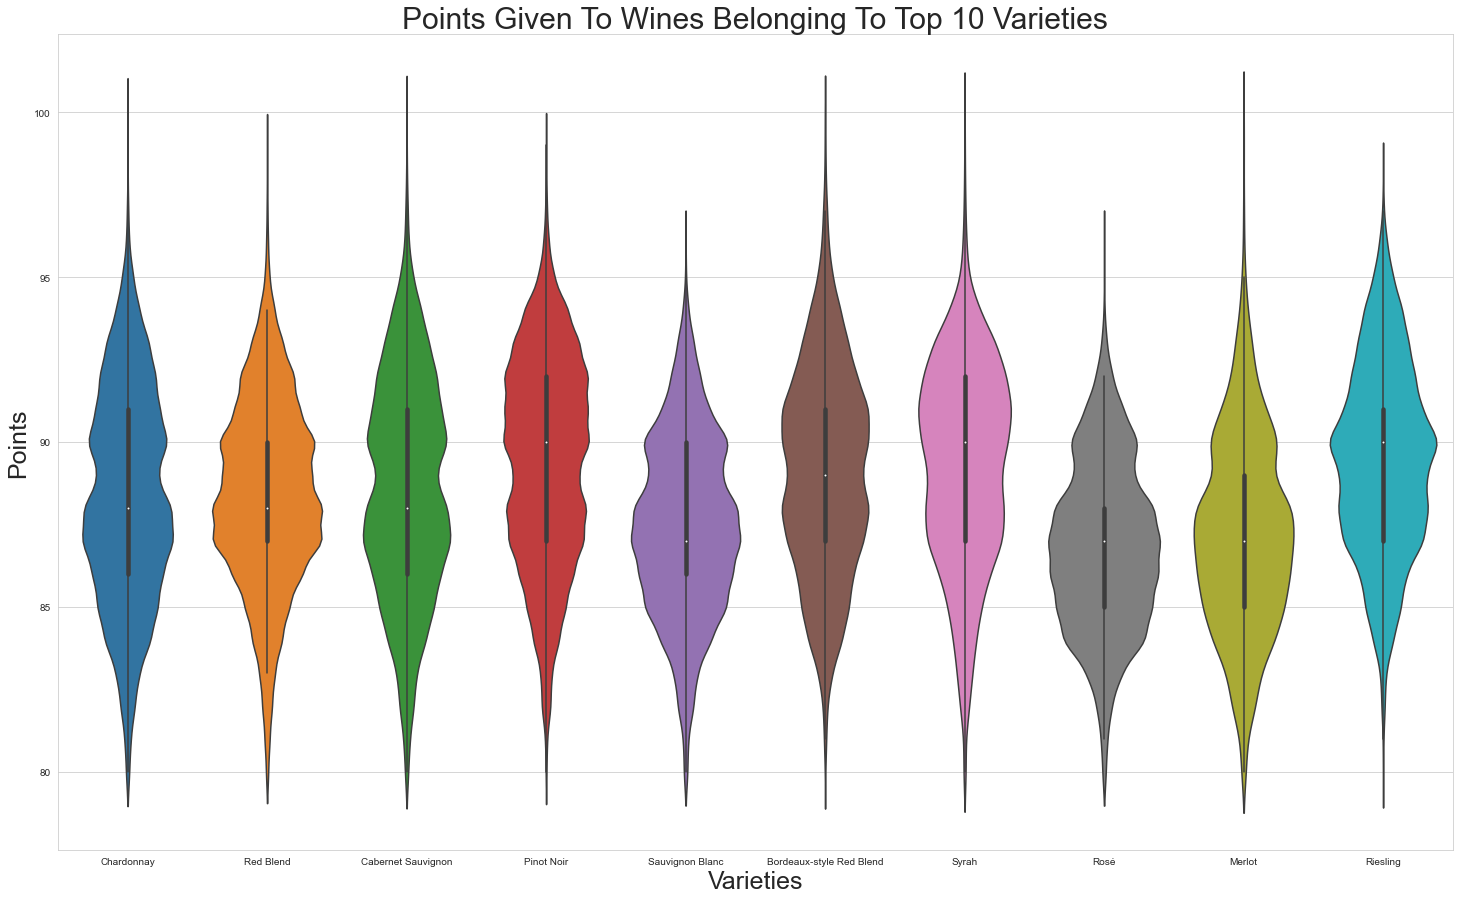

In [95]:
top_10_variety = pd.DataFrame(data['variety'].value_counts()[0:10])
top_10_variety['Index'] = list(range(0,10))
top_10_variety['Variety_Name'] = top_10_variety.index.values
top_10_variety.set_index('Index',inplace = True)
top_10_variety
varieties_points = data[['points','variety']]
varieties_points = varieties_points[varieties_points.variety.isin(top_10_variety.Variety_Name)]
fig, ax = plt.subplots(figsize=(25,15))
sns.set_style("whitegrid")
sns.violinplot(x="variety", y="points", data=varieties_points, fontsize = 50)
plt.ylabel("Points",fontsize = 25)
plt.xlabel("Varieties",fontsize = 25)
plt.title("Points Given To Wines Belonging To Top 10 Varieties",fontsize = 30)

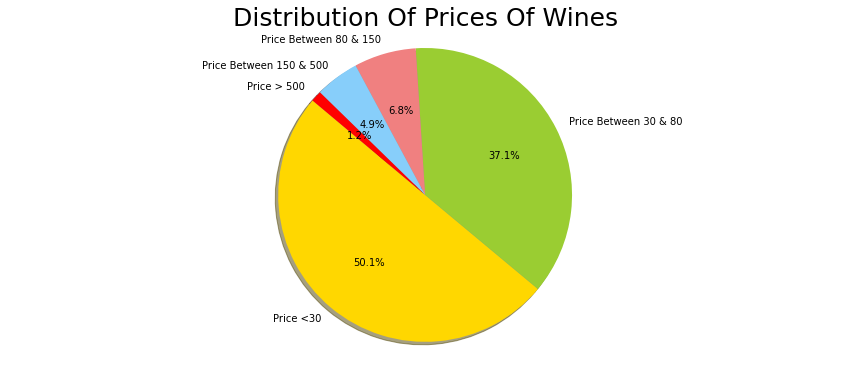

In [89]:
def price_group(pr):
    if(pr>0 and pr<30):
        return 1
    elif(pr >= 30 and pr < 80):
        return 2
    elif(pr >= 80 and pr < 150):
        return 3
    elif(pr >= 150 and pr < 500):
        return 4
    else:
        return 5
data['Price'] = data['price'].apply(price_group)
counts = list(data['Price'].value_counts())    
labels = ['Price <30','Price Between 30 & 80','Price Between 80 & 150','Price Between 150 & 500','Price > 500']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.figure(figsize = (15,6)) 
plt.pie(counts,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution Of Prices Of Wines",fontsize = 25)
plt.axis('equal')
plt.show()

In [75]:
df = data['country'].replace("US", "United States").value_counts()

iplot([go.Choropleth(
    locationmode='country names',
    locations=df.index.values,
    text=df.index,
    z=df.values
)])

In [73]:
country_list=list(data["country"].unique())
wine_point_average=[]
wine_price_average=[]
for i in country_list:
    x=data[data["country"]==i]
    if len(x)!=0:
        country_price_average=round((sum(x.price)/len(x)),2)
        country_points_average=round((sum(x.points)/len(x)),2)
        wine_price_average.append(country_price_average)
        wine_point_average.append(country_points_average)
    else:
        wine_price_average.append("0")
        wine_point_average.append("0")
        
df=pd.DataFrame({"country_list":country_list,"wine_price_average":wine_price_average,"wine_point_average":wine_point_average})

trace1 = go.Scatter(
                    x = df.country_list,
                    y = df.wine_point_average,
                    mode = "lines+markers",
                    name = "points",
                    marker = dict(color = 'blue'),
                    text= df.country_list)

trace2 = go.Scatter(
                    x = df.country_list,
                    y = df.wine_price_average,
                    mode = "lines+markers",
                    name = "price ($)",
                    marker = dict(color = 'green'),
                    text= df.country_list)
data = [trace1, trace2]
layout = dict(title = 'Price and Points Average of Wines by Country',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

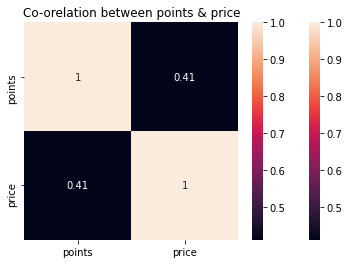

In [48]:
heat = data.corr()
sns.heatmap(heat)
sns.heatmap(heat, annot = True)
plt.title('Co-orelation between points & price')
plt.show()


In [11]:
data.user_name.value_counts().head()

@vossroger      17539
@wineschach      8320
@vboone          6908
@paulgwine       6824
@kerinokeefe     5675
Name: user_name, dtype: int64

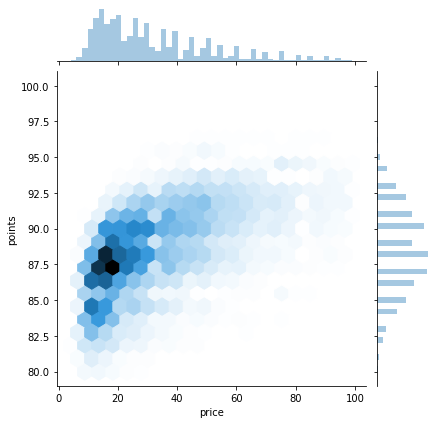

In [18]:
sns.jointplot(x='price', y='points', data = data[data.price < 100], kind='hex', gridsize=20)

In [77]:
df = data.assign(n=0).groupby(['points', 'price'])['n'].count().reset_index()
df = df[df["price"] < 100]
v = df.pivot(index='price', columns='points', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])

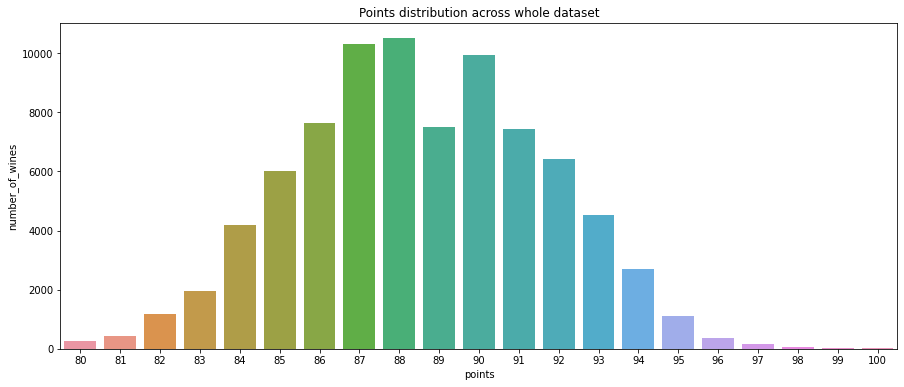

In [78]:
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points distribution across whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()
temp = data["points"].value_counts()
df = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'points', 'number_of_wines')

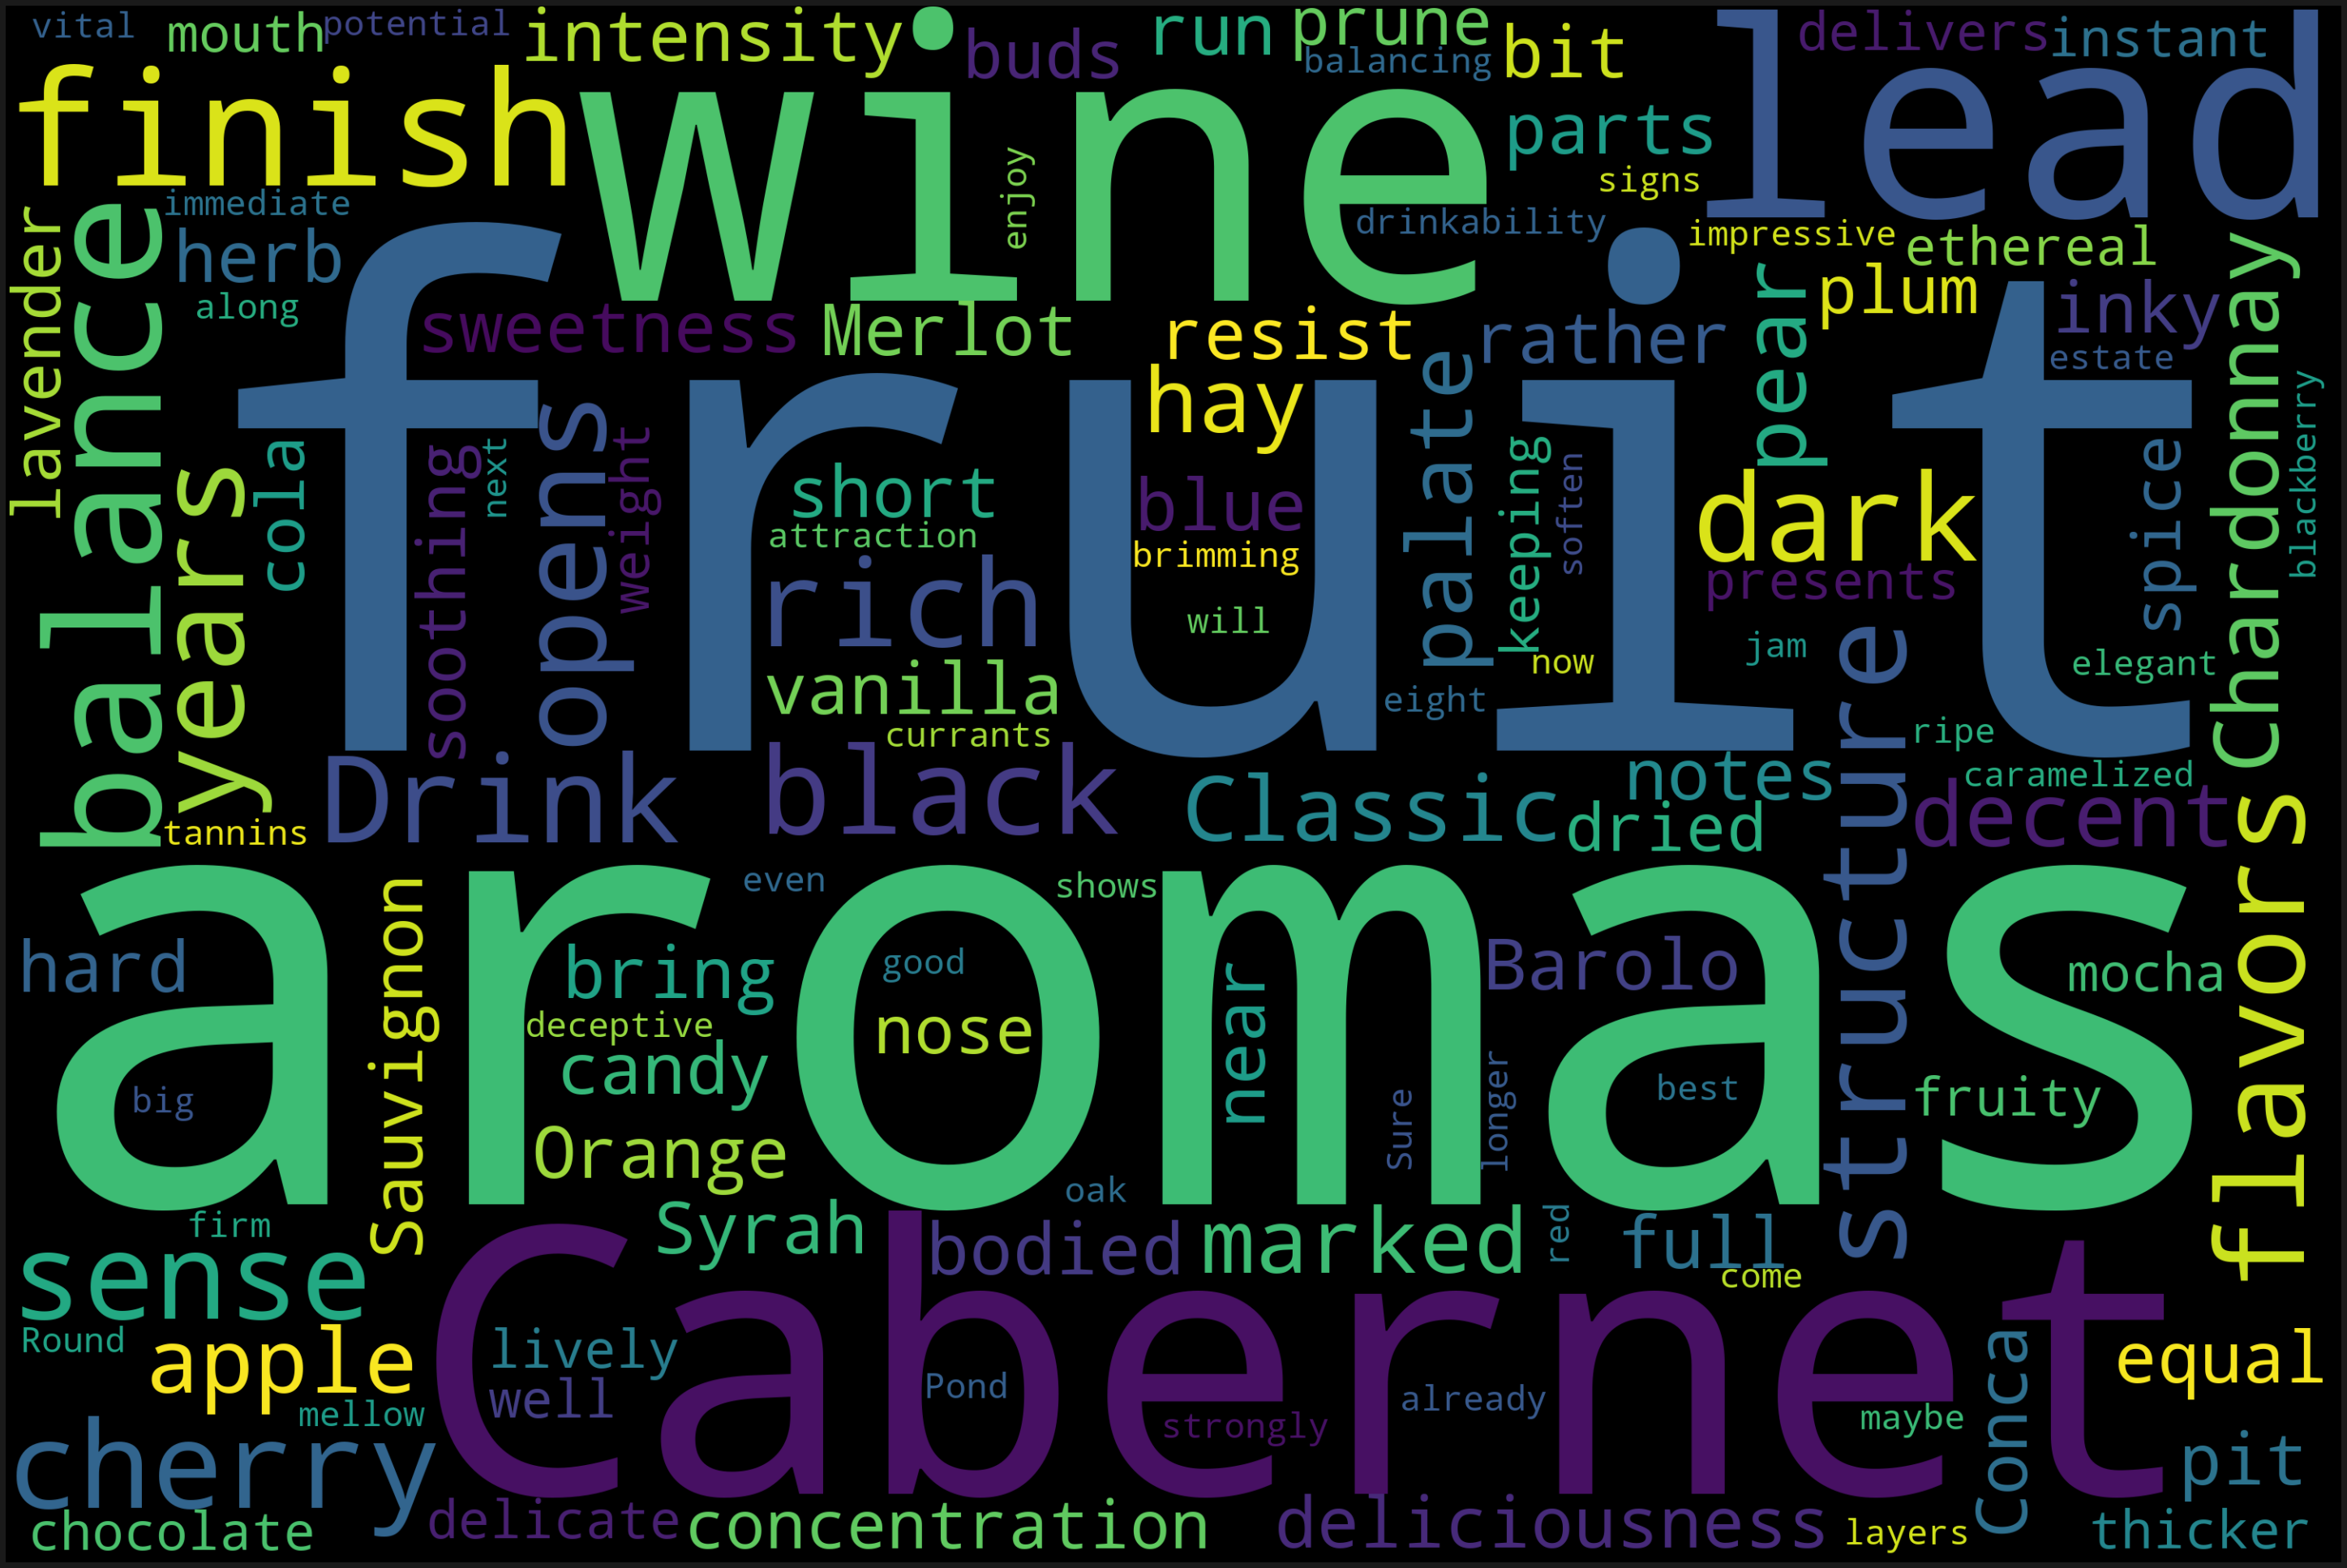

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data.review_description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

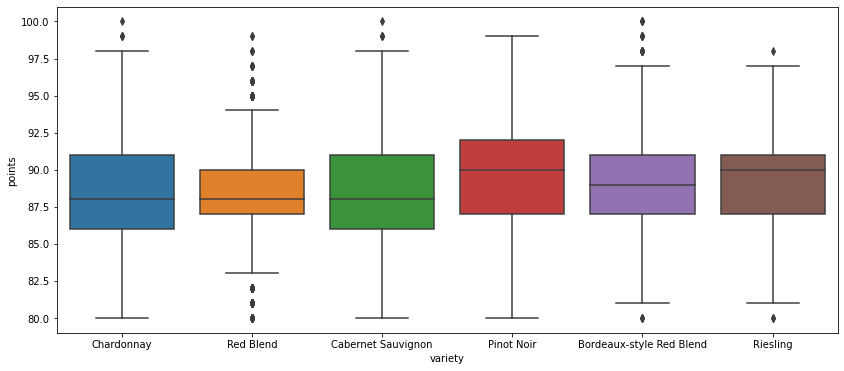

In [24]:
df1= data[data.variety.isin(data.variety.value_counts().head(6).index)]

plt.figure(figsize = (14,6))
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1
)

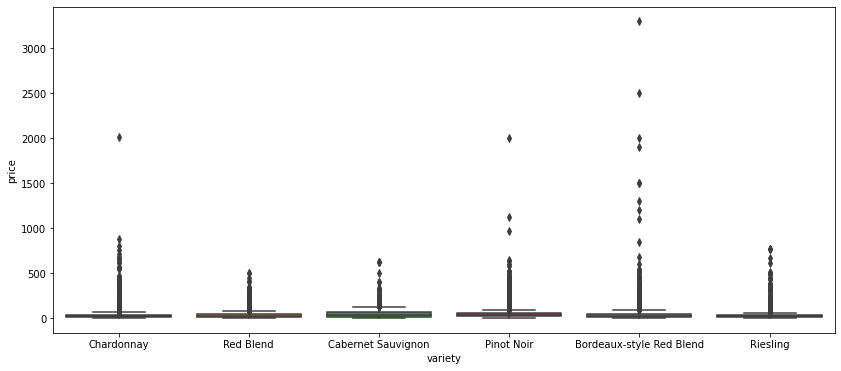

In [50]:
df1= data[data.variety.isin(data.variety.value_counts().head(6).index)]

plt.figure(figsize = (14,6))
sns.boxplot(
    x = 'variety',
    y = 'price',
    data = df1
)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



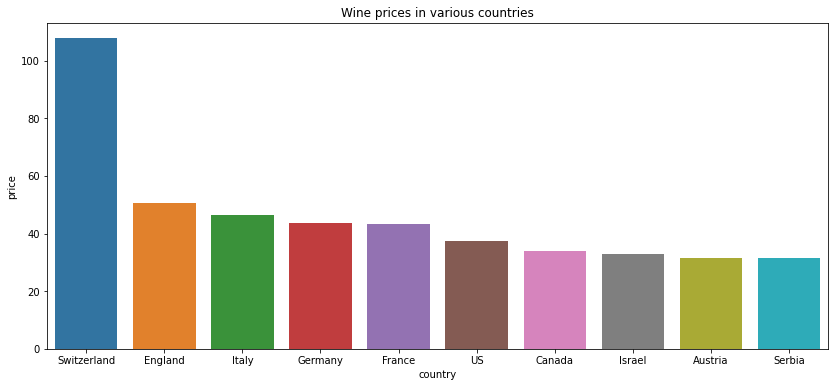

In [49]:
z=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)
plt.figure(figsize = (14,6))
plt.title('Wine prices in various countries')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

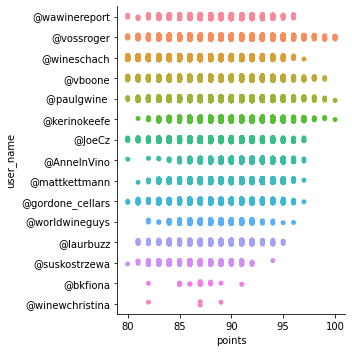

In [86]:
sns.catplot(x = 'points', y = 'user_name', data = data)